In [34]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from datetime import datetime
import time
import json

# 1. DIVIDING DA DATASET

In [35]:
# Load the dataset
df = pd.read_csv("dataquest_fraud_train.csv")
df.head()

,transDate,creditCardNum,business,category,amount,firstName,lastName,gender,street,city,...,latitude,longitude,cityPop,job,dateOfBirth,transNum,unixTime,merchLatitude,merchLongitude,isFraud
0,2019-01-01 4:28,4119762878330980,fraud_Welch Inc,misc_net,4.10,Melinda,Gutierrez,F,1497 West Gateway,Eureka,...,40.7152,-89.2706,6713,Archivist,1945-08-19,3fc1791ff1db94ce9540262d7eb973e4,1325392080,40.020043,-89.693412,0
1,2019-01-01 4:28,36078114201167,fraud_Auer-West,shopping_net,2.67,Christopher,Horn,M,956 Sanchez Highway,Mallie,...,37.2692,-82.9161,798,Facilities manager,1926-06-26,edbf65b8606b53fc48168c2daa5933e5,1325392095,37.622362,-82.676007,0
2,2019-01-01 4:29,4449530933957320,fraud_Balistreri-Nader,misc_pos,22.88,Felicia,Mckee,F,84079 Thomas Burgs,Tomales,...,38.2427,-122.9145,337,Occupational psychologist,1954-07-05,2fcbde131cff833751dde53da54da6da,1325392154,39.060101,-121.969417,0
3,2019-01-01 4:29,4302475216404890,"fraud_Boehm, Predovic and Reinger",misc_pos,9.59,Daniel,Cain,M,384 Newman Forks Apt. 370,Belmond,...,42.8511,-93.6200,3032,Community pharmacist,1964-08-08,bcae564f9a1a299dfbd1efd917499968,1325392158,43.280848,-94.340312,0
4,2019-01-01 4:32,377234009633447,fraud_Hudson-Ratke,grocery_pos,129.06,Theresa,Blackwell,F,43576 Kristina Islands,Shenandoah Junction,...,39.3716,-77.8229,1925,Systems developer,1966-02-14,5e42e35c255edb55a192b3f1f0600936,1325392329,39.211630,-78.409044,0


In [36]:
# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)

# Remove rows where all elements are NaN
df.dropna(how='all', inplace=True)

# Removing firstName, lastName, transNum, creditCardNum columns
df.drop(['firstName', 'lastName', 'transNum', 'creditCardNum', 'street'], axis=1, inplace=True)

# Convert transDate column to datetime format
df['transDate'] = pd.to_datetime(df['transDate'], format='%Y-%m-%d %H:%M')

# Convert transDate to Unix time and create a new unixTime column
df['unixTime'] = df['transDate'].astype('int64') // 10**9
df = df.drop(['transDate'], axis=1)

df.head()

,business,category,amount,gender,city,state,zip,latitude,longitude,cityPop,job,dateOfBirth,unixTime,merchLatitude,merchLongitude,isFraud
0,fraud_Welch Inc,misc_net,4.10,F,Eureka,IL,61530,40.7152,-89.2706,6713,Archivist,1945-08-19,1546316880,40.020043,-89.693412,0
1,fraud_Auer-West,shopping_net,2.67,M,Mallie,KY,41836,37.2692,-82.9161,798,Facilities manager,1926-06-26,1546316880,37.622362,-82.676007,0
2,fraud_Balistreri-Nader,misc_pos,22.88,F,Tomales,CA,94971,38.2427,-122.9145,337,Occupational psychologist,1954-07-05,1546316940,39.060101,-121.969417,0
3,"fraud_Boehm, Predovic and Reinger",misc_pos,9.59,M,Belmond,IA,50421,42.8511,-93.6200,3032,Community pharmacist,1964-08-08,1546316940,43.280848,-94.340312,0
4,fraud_Hudson-Ratke,grocery_pos,129.06,F,Shenandoah Junction,WV,25442,39.3716,-77.8229,1925,Systems developer,1966-02-14,1546317120,39.211630,-78.409044,0


# 2. Catgeorical Data to Numerical Data

## Encoding Catg. Data

In [37]:
# Encoding Gender
df['gender'] = df['gender'].apply(lambda x: 0 if x == 'F' else 1)

# Encoding Age
def calculate_age(birth_date_str):
    birth_date = datetime.strptime(birth_date_str, "%Y-%m-%d")
    today = datetime.now()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age
    
df['age'] = df['dateOfBirth'].apply(calculate_age)
df = df.drop(['dateOfBirth'], axis=1)
df.head()

,business,category,amount,gender,city,state,zip,latitude,longitude,cityPop,job,unixTime,merchLatitude,merchLongitude,isFraud,age
0,fraud_Welch Inc,misc_net,4.10,0,Eureka,IL,61530,40.7152,-89.2706,6713,Archivist,1546316880,40.020043,-89.693412,0,78
1,fraud_Auer-West,shopping_net,2.67,1,Mallie,KY,41836,37.2692,-82.9161,798,Facilities manager,1546316880,37.622362,-82.676007,0,97
2,fraud_Balistreri-Nader,misc_pos,22.88,0,Tomales,CA,94971,38.2427,-122.9145,337,Occupational psychologist,1546316940,39.060101,-121.969417,0,69
3,"fraud_Boehm, Predovic and Reinger",misc_pos,9.59,1,Belmond,IA,50421,42.8511,-93.6200,3032,Community pharmacist,1546316940,43.280848,-94.340312,0,59
4,fraud_Hudson-Ratke,grocery_pos,129.06,0,Shenandoah Junction,WV,25442,39.3716,-77.8229,1925,Systems developer,1546317120,39.211630,-78.409044,0,58


# One Hot Encoding Data

In [38]:
"""
print(df.groupby('job').job.count())
print(df.groupby('state').state.count())
print(df.groupby('city').city.count())
print(df.groupby('category').category.count())
print(df.groupby('business').business.count())
"""

#df = pd.get_dummies(df, columns=['job'])
df = pd.get_dummies(df, columns=['state'])
#df = pd.get_dummies(df, columns=['city'])
df = pd.get_dummies(df, columns=['category'])
#df = pd.get_dummies(df, columns=['business'])

df = df.drop(["job", "city", "business", "zip"], axis=1)
df.head(5)

,amount,gender,latitude,longitude,cityPop,unixTime,merchLatitude,merchLongitude,isFraud,age,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.10,0,40.7152,-89.2706,6713,1546316880,40.020043,-89.693412,0,78,...,False,False,False,False,True,False,False,False,False,False
1,2.67,1,37.2692,-82.9161,798,1546316880,37.622362,-82.676007,0,97,...,False,False,False,False,False,False,False,True,False,False
2,22.88,0,38.2427,-122.9145,337,1546316940,39.060101,-121.969417,0,69,...,False,False,False,False,False,True,False,False,False,False
3,9.59,1,42.8511,-93.6200,3032,1546316940,43.280848,-94.340312,0,59,...,False,False,False,False,False,True,False,False,False,False
4,129.06,0,39.3716,-77.8229,1925,1546317120,39.211630,-78.409044,0,58,...,True,False,False,False,False,False,False,False,False,False


# 3. Adding Features

## Adding distance between transactions

In [39]:
import math
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

# Coordinates of the two points
lat1, lon1 = 37.2692, -82.9161
lat2, lon2 = 37.622362, -82.676007

distanceBetween = []
for index in df.index:
    lat1 = df.iloc[index]["latitude"]
    long1 =  df.iloc[index]["longitude"]
    lat2 = df.iloc[index]["merchLatitude"]
    long2 = df.iloc[index]["merchLongitude"]
    distanceBetween.append(round(haversine(lat1, long1, lat2, long2), 4))

print(distanceBetween[0])
df["distance_between"] = distanceBetween
df.head()
    

85.1941


,amount,gender,latitude,longitude,cityPop,unixTime,merchLatitude,merchLongitude,isFraud,age,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance_between
0,4.10,0,40.7152,-89.2706,6713,1546316880,40.020043,-89.693412,0,78,...,False,False,False,True,False,False,False,False,False,85.1941
1,2.67,1,37.2692,-82.9161,798,1546316880,37.622362,-82.676007,0,97,...,False,False,False,False,False,False,True,False,False,44.6248
2,22.88,0,38.2427,-122.9145,337,1546316940,39.060101,-121.969417,0,69,...,False,False,False,False,True,False,False,False,False,122.4591
3,9.59,1,42.8511,-93.6200,3032,1546316940,43.280848,-94.340312,0,59,...,False,False,False,False,True,False,False,False,False,75.5473
4,129.06,0,39.3716,-77.8229,1925,1546317120,39.211630,-78.409044,0,58,...,False,False,False,False,False,False,False,False,False,53.4864


In [40]:
df.head()

,amount,gender,latitude,longitude,cityPop,unixTime,merchLatitude,merchLongitude,isFraud,age,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance_between
0,4.10,0,40.7152,-89.2706,6713,1546316880,40.020043,-89.693412,0,78,...,False,False,False,True,False,False,False,False,False,85.1941
1,2.67,1,37.2692,-82.9161,798,1546316880,37.622362,-82.676007,0,97,...,False,False,False,False,False,False,True,False,False,44.6248
2,22.88,0,38.2427,-122.9145,337,1546316940,39.060101,-121.969417,0,69,...,False,False,False,False,True,False,False,False,False,122.4591
3,9.59,1,42.8511,-93.6200,3032,1546316940,43.280848,-94.340312,0,59,...,False,False,False,False,True,False,False,False,False,75.5473
4,129.06,0,39.3716,-77.8229,1925,1546317120,39.211630,-78.409044,0,58,...,False,False,False,False,False,False,False,False,False,53.4864


# 4. Normalizing All Data

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Columns to be expressed as a percentage of their total
PERCENT_OF_TOTAL = ["amount", "cityPop"]

# Columns to be scaled to the range [0, 1]
PERCENT_OF_HIGHEST = ["distance_between", "unixTime", "merchLatitude", "merchLongitude", "age"]

# Calculate the percentage of the total for specified columns
for item in PERCENT_OF_TOTAL:
    total = df[item].sum()
    df[item] = (df[item] / total) * 100  # Convert to percentage

# Normalize specified columns to the range [0, 1]
for item in PERCENT_OF_HIGHEST:
    df[item] = scaler.fit_transform(df[[item]])

#df = df.drop(["latitude", "longitude"], axis=1)
df.shape

(181822, 75)

# 5. Balancing Dataset

In [42]:
# Checking Balance of Fraud to No Fraud
def checkBalance(newDf):
    distribution = newDf.groupby("isFraud").isFraud.count()
    print(distribution)
    print(distribution[0] / (distribution[0] + distribution[1]))
    print(distribution[1] / (distribution[0] + distribution[1]))

checkBalance(df)

isFraud
0    180486
1      1336
Name: isFraud, dtype: int64
0.9926521543047596
0.0073478456952403995


In [43]:
# Oversampling and Undersampling Data

# Separate majority and minority classes
majority_class = df[df.isFraud == 0]
minority_class = df[df.isFraud == 1]

# Upsample minority class
minority_upsampled = resample(minority_class,
                              replace=True,     # sample with replacement
                              n_samples=len(majority_class),    # to match majority class size
                              random_state=123) # reproducible results

# Downsample Majority class
majority_downsampled = resample(majority_class,
                              replace=True,     # sample with replacement
                              n_samples=len(minority_class),    # to match majority class size
                              random_state=123) # reproducible results

# Combine Dataframes
oversampledDf = pd.concat([majority_class, minority_upsampled])
undersampledDf = pd.concat([minority_class, majority_downsampled])

#oversampledDf.isFraud.sample(5), undersampledDf.isFraud.sample(5)
oversampledDf.shape, undersampledDf.shape

((360972, 75), (2672, 75))

In [44]:
# Creating X and Y Training Sets
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(
                                                            oversampledDf.drop("isFraud", axis=1),
                                                            oversampledDf.isFraud,
                                                            test_size=0.2, 
                                                            random_state=0
                                                        )
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(
                                                            undersampledDf.drop("isFraud", axis=1),
                                                            undersampledDf.isFraud,
                                                            test_size=0.2, 
                                                            random_state=0
                                                        )

# 6. FEATURE SELECTION WITH RANDOM FOREST

In [45]:
df.sample(5)

,amount,gender,latitude,longitude,cityPop,unixTime,merchLatitude,merchLongitude,isFraud,age,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance_between
97550,0.000485,0,40.8295,-72.6473,0.000020,0.812560,0.462920,0.948663,0,0.3250,...,False,False,False,False,False,False,False,False,False,0.361959
76718,0.000817,1,43.3526,-102.5411,0.000007,0.784495,0.491119,0.642162,0,0.3000,...,False,False,False,False,False,False,False,False,False,0.698430
43632,0.000402,0,33.3749,-99.8473,0.000001,0.637483,0.306789,0.674839,0,0.2625,...,False,False,False,False,False,False,False,False,False,0.347654
159770,0.000180,0,45.8327,-91.0144,0.000009,0.890839,0.576148,0.761029,0,0.4875,...,False,False,True,False,False,False,False,False,False,0.488501
126605,0.000195,0,46.0062,-86.2555,0.000040,0.848499,0.571011,0.809402,0,0.3125,...,False,True,False,False,False,False,False,False,False,0.217088


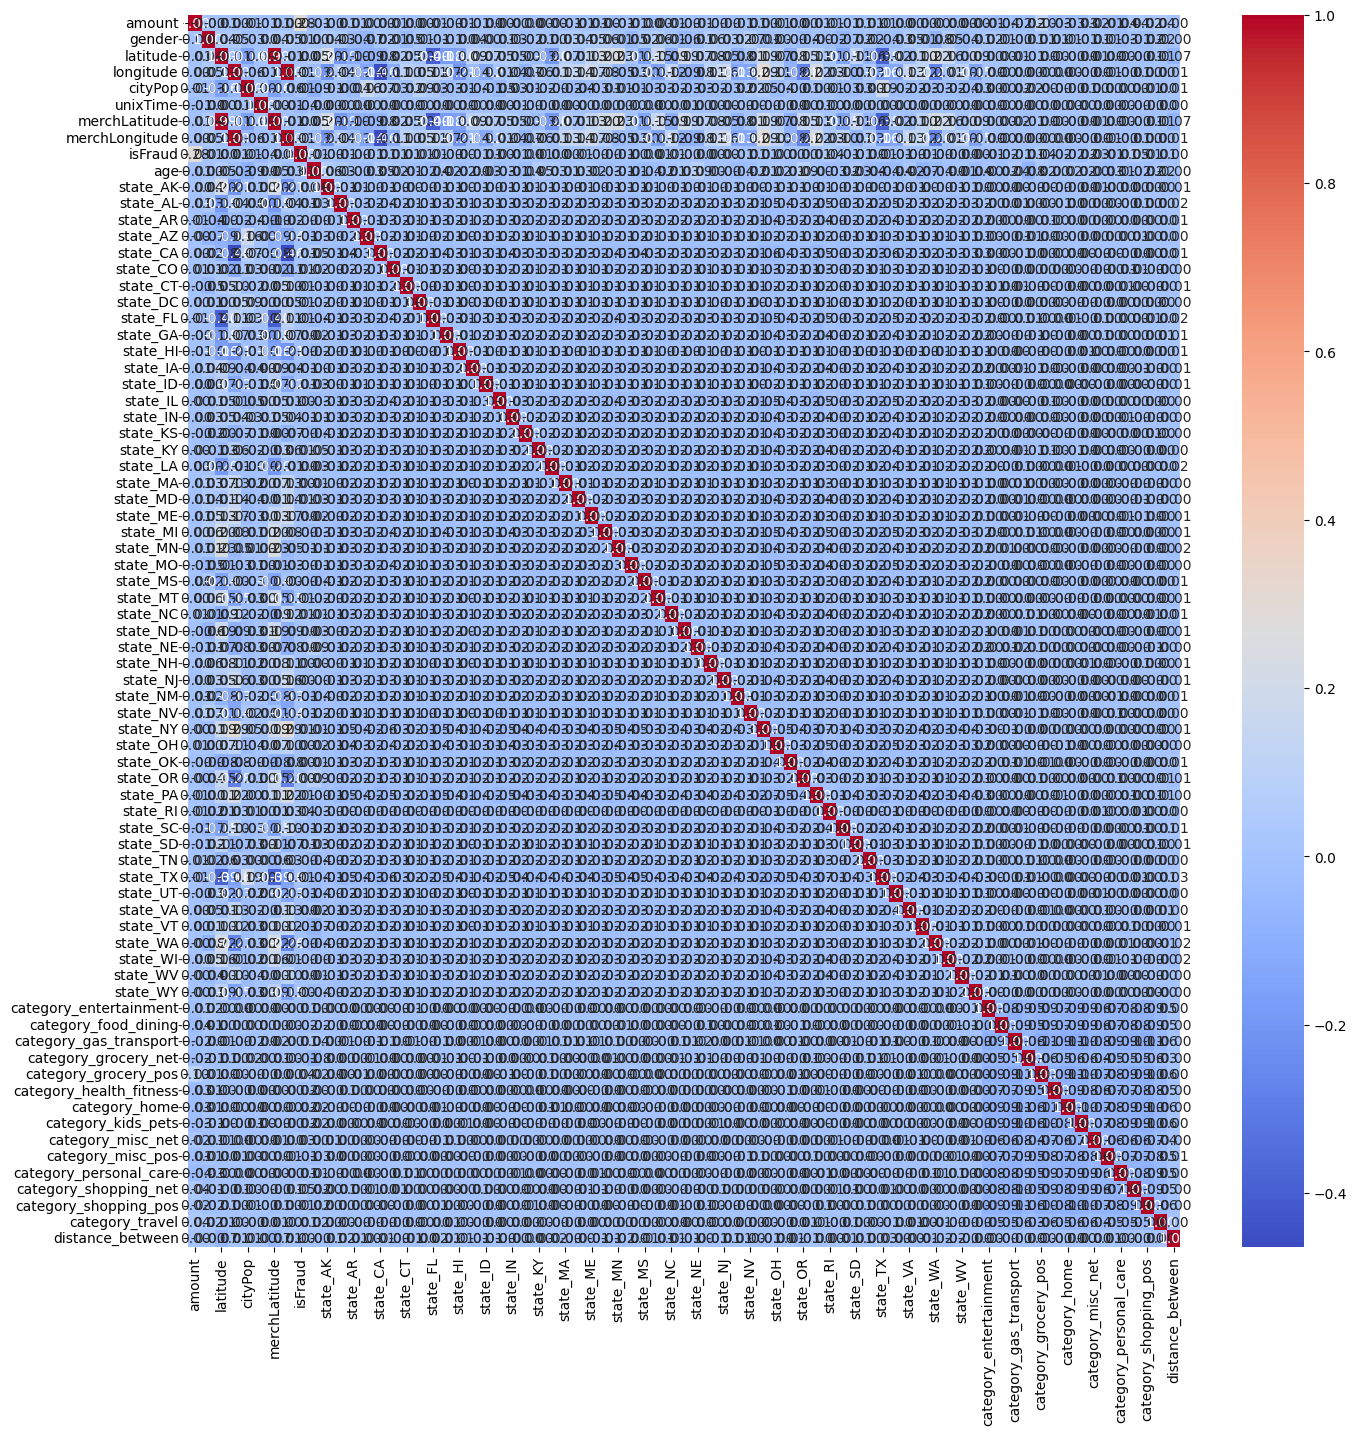

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the matplotlib figure
plt.figure(figsize=(16, 16))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()


In [47]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Fit the RandomForestClassifier
sel = RandomForestClassifier(n_estimators=100)
sel.fit(X_under_train, y_under_train)

# Get the importances of features
importances = sel.feature_importances_

# Set a threshold for feature selection: for instance, the median of importances
threshold_value = np.median(importances)

# Create the SelectFromModel object with your defined threshold
selection = SelectFromModel(sel, threshold=threshold_value)
selection.fit(X_under_train, y_under_train)

# Get the boolean mask of the selected features
selected_features_mask = selection.get_support()

# Get the names of the selected features
selected_features = X_under_train.columns[selected_features_mask]

# Count and print the selected features
print(f"Number of selected features: {selected_features.shape[0]}")
print(selected_features)


Number of selected features: 37
Index(['amount', 'gender', 'latitude', 'longitude', 'cityPop', 'unixTime',
       'merchLatitude', 'merchLongitude', 'age', 'state_CA', 'state_CO',
       'state_IL', 'state_KY', 'state_MD', 'state_MT', 'state_NC', 'state_NY',
       'state_OH', 'state_PA', 'state_TX', 'state_VA', 'state_WV',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'distance_between'],
      dtype='object')


In [54]:
features_df = pd.DataFrame({
    'Feature': X_under_train.columns,
    'Importance': importances
})

# Rank features by importance
features_df = features_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Calculate the percentage of each feature's importance relative to the maximum
features_df['Importance (%)'] = (features_df['Importance'] / features_df['Importance'].max()) * 100

# Display the ranked features with their importances
print(features_df.head(20))

                    Feature  Importance  Importance (%)
0                    amount    0.417826      100.000000
1                  unixTime    0.135878       32.520348
2                       age    0.045202       10.818497
3                  latitude    0.036551        8.748004
4             merchLatitude    0.035134        8.408747
5                 longitude    0.034647        8.292266
6                   cityPop    0.033939        8.122746
7            merchLongitude    0.033080        7.917094
8          distance_between    0.028155        6.738542
9     category_shopping_net    0.023741        5.681980
10   category_gas_transport    0.016765        4.012409
11     category_grocery_pos    0.015117        3.618028
12        category_misc_net    0.010718        2.565126
13            category_home    0.009818        2.349768
14                   gender    0.008162        1.953508
15       category_kids_pets    0.007696        1.841843
16     category_food_dining    0.007296        1

# 7. Dropping Columns

In [48]:

# List of columns to keep
columns_to_keep = ['amount', 'gender', 'latitude', 'longitude', 'cityPop', 'unixTime',
       'merchLatitude', 'merchLongitude', 'age', 'state_CO', 'state_IL',
       'state_KY', 'state_MD', 'state_MN', 'state_MT', 'state_NC', 'state_NY',
       'state_OH', 'state_OK', 'state_PA', 'state_SD', 'state_TX', 'state_VA',
       'state_WV', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'distance_between', 'isFraud']

# Create a new DataFrame with only the specified columns
X_under_train = X_under_train[columns_to_keep]
X_under_test = X_under_test[columns_to_keep]

KeyError: "['isFraud'] not in index"

## Applying to the whole dataset

In [49]:
# List of columns to keep
columns_to_keep = ['amount', 'gender', 'latitude', 'longitude', 'cityPop', 'unixTime',
       'merchLatitude', 'merchLongitude', 'age', 'state_CO', 'state_IL',
       'state_KY', 'state_MD', 'state_MN', 'state_MT', 'state_NC', 'state_NY',
       'state_OH', 'state_OK', 'state_PA', 'state_SD', 'state_TX', 'state_VA',
       'state_WV', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'distance_between', 'isFraud']

df = df[columns_to_keep]
df.to_csv("./data/data2.csv")

df.head()

,amount,gender,latitude,longitude,cityPop,unixTime,merchLatitude,merchLongitude,age,state_CO,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance_between,isFraud
0,0.000032,0,40.7152,-89.2706,0.000041,0.000000,0.440700,0.772111,0.7375,False,...,False,False,True,False,False,False,False,False,0.572049,0
1,0.000021,1,37.2692,-82.9161,0.000005,0.000000,0.390349,0.842510,0.9750,False,...,False,False,False,False,False,True,False,False,0.298690,0
2,0.000178,0,38.2427,-122.9145,0.000002,0.000002,0.420541,0.448314,0.6250,False,...,False,False,False,True,False,False,False,False,0.823143,0
3,0.000074,1,42.8511,-93.6200,0.000019,0.000002,0.509176,0.725492,0.5000,False,...,False,False,False,True,False,False,False,False,0.507048,0
4,0.001002,0,39.3716,-77.8229,0.000012,0.000008,0.423723,0.885317,0.4875,False,...,False,False,False,False,False,False,False,False,0.358400,0


In [32]:
df.shape

(181822, 39)